# Implementing  Of ANN Using Keras

# Weight Intialization

In [14]:
#importing Libriries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os


# Creating Simple Classifier using Keras on MNIST Data

In [15]:
mnist = tf.keras.datasets.mnist

In [16]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [17]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [18]:
X_train_full.shape

(60000, 28, 28)

In [19]:
X_test.shape

(10000, 28, 28)

In [30]:
# Create a validation sdata set from the Full traing data set
#Scale the data between 0 to 1  by dividing it by 255.as its unsigned data between 0 - 255  range
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

#Scale the test set   as well
X_test = X_test / 255


In [21]:
len(X_train_full[5000:])

55000

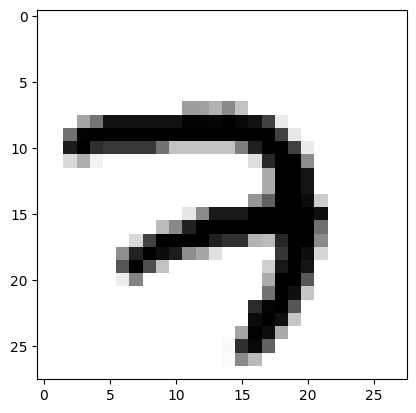

In [22]:
# lets See  some data
plt.imshow(X_train[0], cmap = 'binary')
plt.show()

<Axes: >

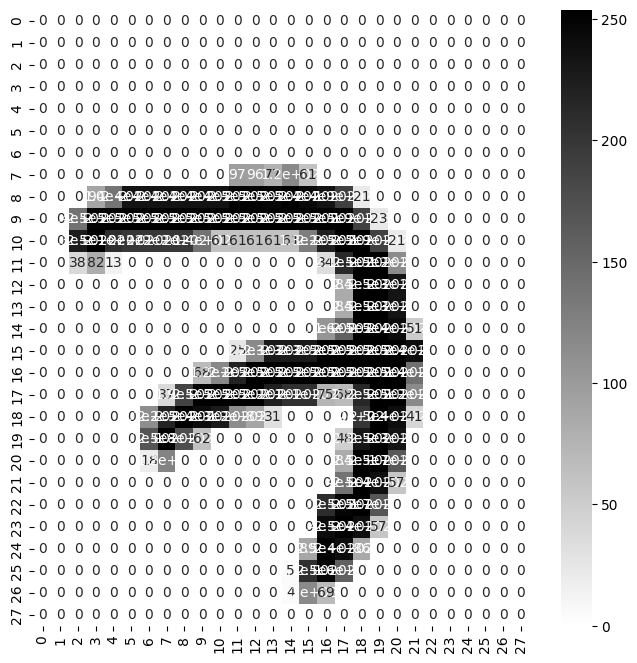

In [23]:
plt.figure(figsize = (8, 8))
sns.heatmap(X_train[0],annot = True, cmap = 'binary')

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Flatten,Dropout

## define the model

model = Sequential()
model.add(Flatten(input_shape= [ 28,28], name = "inputlayer"))
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = tf.keras.initializers.HeNormal(seed = None)))
model.add(Dropout(0.2))
model.add(Dense(units = 32, activation = 'relu', kernel_initializer = tf.keras.initializers.HeNormal(seed = None)))
model.add(Dropout(0.1))
model.add(Dense(units = 16, activation = 'relu', kernel_initializer = tf.keras.initializers.HeNormal(seed = None)))
model.add(Dropout (0.2))
model.add(Dense(units = 10, activation = 'softmax'))


In [25]:
# prompt:

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)               

In [27]:
LOSS_FUNCTION = 'sparse_categorical_crossentropy'
OPTIMIZER = "SGD"
sgd = tf.keras.optimizers.SGD(
    learning_rate = 0.01,
    momentum = 0.9)
METRICS = ["accuracy"]

model.compile(loss = LOSS_FUNCTION, optimizer= sgd,
              metrics = METRICS)

In [31]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train,y_train,epochs = EPOCHS, validation_data= VALIDATION_SET,batch_size = 32)

Epoch 1/5
1719/1719 [==============================] - 10s 6ms/step - loss: 1053435554168832.0000 - accuracy: 0.1101 - val_loss: 2.3011 - val_accuracy: 0.1126
Epoch 2/5
1719/1719 [==============================] - 6s 4ms/step - loss: 2.3021 - accuracy: 0.1103 - val_loss: 2.3021 - val_accuracy: 0.1126
Epoch 3/5
1719/1719 [==============================] - 6s 3ms/step - loss: 2.3019 - accuracy: 0.1107 - val_loss: 2.3023 - val_accuracy: 0.1126
Epoch 4/5
1719/1719 [==============================] - 6s 4ms/step - loss: 2.3020 - accuracy: 0.1106 - val_loss: 2.3008 - val_accuracy: 0.1126
Epoch 5/5
1719/1719 [==============================] - 8s 4ms/step - loss: 2.3020 - accuracy: 0.1109 - val_loss: 2.3015 - val_accuracy: 0.1126
